## Information about how to set up files
Split up images into three folders:
- base 
- bleach 
- recovery 

Rename all images to e(number) and log these changes on a spreadsheet.

## Notes for this experiment: 
link to Benchling page with spreadsheet: https://benchling.com/tiffanyqlu/f/lib_yh6OKBxx-imaging/etr_3yuWv5WX-a-catenin-rnai/edit


## Load packages, etc.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import os
import csv
import seaborn as sea
from matplotlib.cm import get_cmap  # Import colormap functionality from Matplotlib
from itertools import cycle
from matplotlib import rc

## Set base path for images

In [2]:
# Set base file path
base_path = Path('C:\\UChicago\\Munro_lab\\tracking\\analysis\\acatRNAi_5.29.24')

## Import data for the baseline measurements:
comments

In [3]:
def readCSVs(full_path):
    base_df = []

    # Iterate through all files
    for file_name in os.listdir(full_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(full_path, file_name)
            df = pd.read_csv(file_path)
            
            # Add columns with time, phase, embryo
            df['time (s)'] = [i * 2 for i in range(len(df))]  # Change this depending on the interval
            df['phase'] = ['base'] * len(df)
            df['embryo'] = file_name.split('_')[0]
            
            # Append to full df
            base_df.append(df)
    
    # Concatenate dataframes
    if base_df:
        base_df = pd.concat(base_df, ignore_index=True)
    else:
        base_df = pd.DataFrame()  # return empty data frame if no CSVs found
    
    return base_df

full_path = os.path.join(base_path, 'ctrl', 'base')

# Run it
base_df = readCSVs(full_path)

print(base_df.head())

   frame  counts  meanIntensity  totalIntensity  time (s) phase embryo
0      1     202   48030.999998    9.702262e+06         0  base    e11
1      2     213   46273.600177    9.856277e+06         2  base    e11
2      3     202   46089.204526    9.310019e+06         4  base    e11
3      4     190   44689.621039    8.491028e+06         6  base    e11
4      5     199   46755.903002    9.304425e+06         8  base    e11


## Import data for the bleaching measurements:

In [4]:
def readCSVs(full_path):
    bleach_df = []

    # Iterate through all files
    for file_name in os.listdir(full_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(full_path, file_name)
            df = pd.read_csv(file_path)
            
            # Add columns with time, phase, embryo
            df['time (s)'] = [i * 0.05 for i in range(len(df))]  # Change this depending on the interval
            df['time (s)']=df['time (s)']+ 10
            df['phase'] = ['bleach'] * len(df)
            df['embryo'] = file_name.split('_')[0]
            
            # Append to full df
            bleach_df.append(df)
            
    
    # Concatenate dataframes
    if bleach_df:
        bleach_df = pd.concat(bleach_df, ignore_index=True)
    else:
        bleach_df = pd.DataFrame()  # return empty data frame if no CSVs found
    
    return bleach_df

full_path = os.path.join(base_path, 'ctrl', 'bleach')

# Run it
bleach_df = readCSVs(full_path)

print(bleach_df.head())

   frame  counts  meanIntensity  totalIntensity  time (s)   phase embryo
0      1     182   31001.662807    5.642303e+06     10.00  bleach    e11
1      2     182   29760.279645    5.416371e+06     10.05  bleach    e11
2      3     168   30018.765742    5.043153e+06     10.10  bleach    e11
3      4     173   29126.228448    5.038838e+06     10.15  bleach    e11
4      5     172   28873.568993    4.966254e+06     10.20  bleach    e11


## Import data for the recovery measurements:

In [5]:
def readCSVs(full_path):
    recovery_df = []

    # Iterate through all files
    for file_name in os.listdir(full_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(full_path, file_name)
            df = pd.read_csv(file_path)
            
            # Add columns with time, phase, embryo
            df['time (s)'] = [i * 1 for i in range(len(df))]  # Change this depending on the interval
            df['time (s)']=df['time (s)']+ 40
            df['phase'] = ['recovery'] * len(df)
            df['embryo'] = file_name.split('_')[0]
            
            # Append to full df
            recovery_df.append(df)
    
    # Concatenate dataframes
    if recovery_df:
        recovery_df = pd.concat(recovery_df, ignore_index=True)
    else:
        recovery_df = pd.DataFrame()  # return empty data frame if no CSVs found
    
    return recovery_df

full_path = os.path.join(base_path, 'ctrl', 'recovery')

# Run it
recovery_df = readCSVs(full_path)

print(recovery_df.head())

   frame  counts  meanIntensity  totalIntensity  time (s)     phase embryo
0      1      55   13219.393002    7.270666e+05        40  recovery    e11
1      2      95   14790.399850    1.405088e+06        41  recovery    e11
2      3     159   15034.142017    2.390429e+06        42  recovery    e11
3      4     163   16724.621447    2.726113e+06        43  recovery    e11
4      5     203   16993.810033    3.449743e+06        44  recovery    e11


## Combine the data frames

In [6]:
full_df = pd.concat([base_df, bleach_df, recovery_df])
print(full_df.head())

   frame  counts  meanIntensity  totalIntensity  time (s) phase embryo
0      1     202   48030.999998    9.702262e+06       0.0  base    e11
1      2     213   46273.600177    9.856277e+06       2.0  base    e11
2      3     202   46089.204526    9.310019e+06       4.0  base    e11
3      4     190   44689.621039    8.491028e+06       6.0  base    e11
4      5     199   46755.903002    9.304425e+06       8.0  base    e11


## Get baseline intensity measurement

In [7]:
# Calculate average total intensity for each embryo during the base phase
avg_int = base_df.groupby('embryo')['totalIntensity'].mean().reset_index()
avg_int.rename(columns={'totalIntensity': 'avg_int'}, inplace=True)
print(avg_int)

  embryo       avg_int
0     e1  7.240701e+06
1    e11  9.332802e+06
2     e2  7.870980e+06
3     e3  6.870075e+06
4     e7  7.739688e+06
5     e8  2.606180e+07


## Normalize 

In [8]:
# Normalize the intensity values in the base phase
norm_base_df = base_df.merge(avg_int, on='embryo')
norm_base_df['normIntensity'] = norm_base_df['totalIntensity'] / norm_base_df['avg_int']
#print(norm_bleach_df.head())

# Normalize the intensity values in the bleach phase
norm_bleach_df = bleach_df.merge(avg_int, on='embryo')
norm_bleach_df['normIntensity'] = norm_bleach_df['totalIntensity'] / norm_bleach_df['avg_int']
#print(norm_bleach_df.head())

# Normalize the intensity values in the recovery phase
norm_recovery_df = recovery_df.merge(avg_int, on='embryo')
norm_recovery_df['normIntensity'] = norm_recovery_df['totalIntensity'] / norm_recovery_df['avg_int']
#print(norm_recovery_df.head())

# Combine these data frames for plotting
full_normdf = pd.concat([norm_base_df, norm_bleach_df, norm_recovery_df])
print(full_normdf.head())

   frame  counts  meanIntensity  totalIntensity  time (s) phase embryo  \
0      1     202   48030.999998    9.702262e+06       0.0  base    e11   
1      2     213   46273.600177    9.856277e+06       2.0  base    e11   
2      3     202   46089.204526    9.310019e+06       4.0  base    e11   
3      4     190   44689.621039    8.491028e+06       6.0  base    e11   
4      5     199   46755.903002    9.304425e+06       8.0  base    e11   

        avg_int  normIntensity  
0  9.332802e+06       1.039587  
1  9.332802e+06       1.056090  
2  9.332802e+06       0.997559  
3  9.332802e+06       0.909805  
4  9.332802e+06       0.996959  


## Get half max recovery values

In [9]:
#find max recovery per embryo
max_recovery_df = recovery_df.sort_values('totalIntensity', ascending = False).groupby('embryo').head(1)
max_vals = max_recovery_df[["totalIntensity","embryo"]]
max_vals["totalIntensity"] = 0.5*(max_vals["totalIntensity"])
max_vals.rename(columns={'totalIntensity': 'halfmax'}, inplace=True)
print(max_vals)

          halfmax embryo
341  5.273663e+06     e8
53   2.752207e+06    e11
182  2.536584e+06     e2
221  2.318710e+06     e3
97   2.318061e+06     e1
267  2.034771e+06     e7


<ipython-input-9-cb70db9a43f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_vals["totalIntensity"] = 0.5*(max_vals["totalIntensity"])
C:\Users\Tisiphone\anaconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Get time to half max

In [10]:
recovery_df_hm = recovery_df.merge(max_vals, on='embryo')
results = []

unique_embryos = recovery_df_hm['embryo'].unique()

# Iterate through each embryo, find the first intersection time, and store the results
for embryo in unique_embryos:
    # Filter data for the current embryo
    embryo_data = recovery_df_hm[recovery_df_hm['embryo'] == embryo].copy()
    
    target_value = embryo_data['halfmax'].iloc[0]
    
    # Calculate the difference between totalIntensity and the target value
    embryo_data['Diff'] = embryo_data['totalIntensity'] - target_value

    # Identify the points where the sign of the difference changes (crossing points)
    sign_change_indices = np.where(np.diff(np.sign(embryo_data['Diff'])))[0]

    # Find the first intersection time using interpolation
    if len(sign_change_indices) > 0:
        index = sign_change_indices[0]
        x1, x2 = embryo_data['time (s)'].iloc[index], embryo_data['time (s)'].iloc[index + 1]
        y1, y2 = embryo_data['totalIntensity'].iloc[index], embryo_data['totalIntensity'].iloc[index + 1]

        intersection_time = x1 + (target_value - y1) * (x2 - x1) / (y2 - y1)

        # Store the intersection time for the current embryo in the results list
        results.append({'Embryo': embryo, 'IntersectionTime': intersection_time})
    else:
        results.append({'Embryo': embryo, 'IntersectionTime': np.nan})
half_max_times = pd.DataFrame(results)

#Fix time offset
half_max_times['IntersectionTime']=half_max_times['IntersectionTime']-40
half_max_times = (half_max_times).dropna()

print(half_max_times)
half_max_times['IntersectionTime'].mean()

  Embryo  IntersectionTime
0    e11          3.036059
1     e1          2.882356
2     e2          4.673031
3     e3          2.971705
4     e7          6.037365
5     e8          2.925191


3.7542844148551247

## Plots

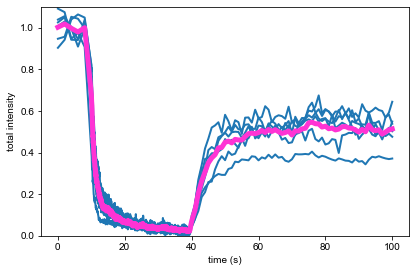

In [11]:
unique_embryos = full_normdf['embryo'].unique()


# Loop through each unique embryo and plot the corresponding data
for embryo in unique_embryos:
    embryo_data = full_normdf[full_normdf['embryo'] == embryo]
    plt.plot(embryo_data['time (s)'], embryo_data['normIntensity'], label=embryo, 
             color='#1F77B4', linewidth=2)
    
# Calculate and plot the average normalized intensity
average_data = full_normdf.groupby('time (s)')['normIntensity'].mean().reset_index()
plt.plot(average_data['time (s)'], average_data['normIntensity'], label='Average', color= '#ff33d4', linewidth=5)

# Add labels and legend
plt.xlabel('time (s)')
plt.ylabel('total intensity')
#plt.title('ctrl')
plt.ylim(0, 1.1)
#plt.xlim(40,100)

#Formatting
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(False)
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.tight_layout()

#Save
savefig('ctrlFRAPacatRNAi5.29.24.svg', transparent=True,dpi=400)
plt.show()

<ipython-input-24-92d993b41fb9>:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


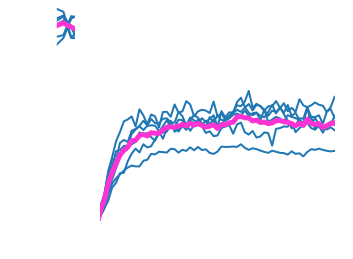

In [24]:
# Create broken axis using two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(5,4), gridspec_kw={'wspace': 0.2,'width_ratios': [5, 60]}) 
## adjust fig size here!

# Define time ranges
left_range = (0, 5)
right_range = (40, full_normdf['time (s)'].max())

# Plot each embryo's data
unique_embryos = full_normdf['embryo'].unique()
for embryo in unique_embryos:
    embryo_data = full_normdf[full_normdf['embryo'] == embryo]
    ax1.plot(embryo_data['time (s)'], embryo_data['normIntensity'], color='#1F77B4', linewidth=2)
    ax2.plot(embryo_data['time (s)'], embryo_data['normIntensity'], color='#1F77B4', linewidth=2)

# Plot average
average_data = full_normdf.groupby('time (s)')['normIntensity'].mean().reset_index()
ax1.plot(average_data['time (s)'], average_data['normIntensity'], label='Average', color='#ff33d4', linewidth=5)
ax2.plot(average_data['time (s)'], average_data['normIntensity'], label='Average', color='#ff33d4', linewidth=5)

# Set limits to show the broken axis
ax1.set_xlim(*left_range)
ax2.set_xlim(*right_range)
ax1.set_ylim(0, 1.1)

# Hide spines between ax1 and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()


# Diagonal break markers

#d = .015
#kwargs = dict(transform=ax1.transAxes, color=COLOR, clip_on=False)
#ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
#ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

#kwargs.update(transform=ax2.transAxes)
#ax2.plot((-d, +d), (-d, +d), **kwargs)
#ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

# Formatting
COLOR = 'white'
fig.text(0.5, 0.04, 'time (s)', ha='center', color=COLOR)
ax1.set_ylabel('total intensity', color=COLOR)
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(False)
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.tight_layout()

plt.savefig('C:\\UChicago\\Munro_lab\\tracking\\analysis\\acatRNAi_5.29.24\\FRAPbrokenaxes.svg', transparent=True,dpi=400)
plt.show()

C:\Users\Tisiphone\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Tisiphone\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


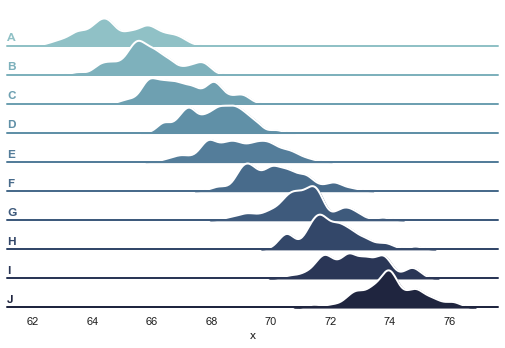

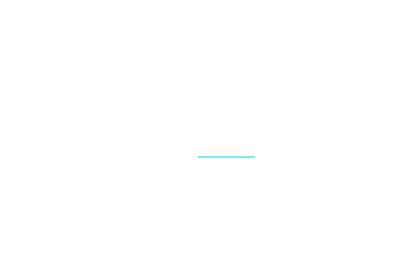

In [12]:
boxprops = dict(color='white',linewidth=2)
whiskerprops = dict(color='white',linewidth=2)
capprops = dict(color='white',linewidth=2)
medianprops = dict(color='#78eafc',linewidth=2)
plt.boxplot(half_max_times['IntersectionTime'], boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops,
           capprops=capprops)

plt.ylabel('time to half max (s)')
plt.ylim(0,8)

#Formatting
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(False)
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
import matplotlib.pyplot as plt


SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.tight_layout()

savefig('ctrlhalfmax.svg', transparent=True,dpi=400)
plt.show()

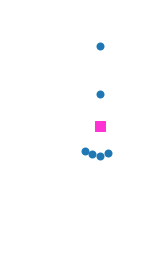

In [28]:
fig, ax = plt.subplots(figsize=(2.5,4))
p=sea.swarmplot(y="IntersectionTime", data=half_max_times, s=8)



plt.ylim(0,7)
sea.boxplot(showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"#ff33d4", "markeredgecolor":"#ff33d4","markersize": "10"},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            y="IntersectionTime",
            data=half_max_times,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.ylabel("time to half max (s)")
savefig('C:\\UChicago\\Munro_lab\\tracking\\analysis\\acatRNAi_5.29.24\\poster_ctrlhalfmaxscatter.svg', transparent=True,dpi=400)
plt.tight_layout()
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.show()